# Study project. Gaming market analytics

## Description

We have an online shop "World of Games" which sells video games all over the world. We have data about games: names, raitings, sales, genres and platforms. We need to understand which games tend to be more successful in future to choose them for selling in our shop.

We have data for 2016. It is December 2016 now and we plan our campaign for 2017.

### [Part 1. What do we have in our dataset?](#step1)

Explore our data and prepare it for future analysis.

### [Part 2. Preparing our data to future analysis](#step2)

- [2-1. Columns names](#2-1) 
- [2-2. Filling data gaps](#2-2) – we have statistics test in future alanysis, so we need be sure we don't have any gaps;
- [2-3. Revenue columns](#2-3) - we would like to compare revenue in different regions, so it would be easier to have a sum colums;
- [2-4. Final table](#2-4)

### [Part 3. Data analytics](#step3)

- [3-1. Games by years of release](#3-1)
- [3-2. Games by platforms](#3-2)
- [3-3. Dependence of users score on sales](#3-3)
- [3-4. Profitable genres](#3-4)

### [Part 4. User profile](#step4)

- [4-1. Platforms by regions](#4-1)
- [4-2. Genres by regions](#4-2)
- [4-3. Age ranking by regions](#4-3)

### [Part 5. Testing Hypotheses](#step5)

- [5-1. Hypothesis 1.](#5-1)
- [5-2. Hypothesis 2.](#5-1)

### [Part 6. Results and learnings](#step6)

## <a id="step1">Part 1. Exporing the data we have</a>

Exporting libs:

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
from scipy import stats as st
import math
import matplotlib.pyplot as plt

Export our data in CSV to look at it:

In [2]:
games = pd.read_csv('~/datasets/games.csv')
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


We have a document with 16 715 rows we saved as @games. Every row has a name, a platform is was realeased at, a year of it's release, a genre, an information about sales in different regions, critic's and user's score and age rating.

## <a id="step2">Part 2. Data preparation</a>

In this part we need to process our document: change columns names, fill the gaps, cast colums type to right types and add a column with summary sales to future analysis.

### <a id="2-1">2-1. Columns names</a>

Convert columns names to lower case:

In [3]:
games.columns = games.columns.str.lower()

### <a id="2-2">2-2. Filling the gaps</a>

We would like to fill cells with missing data: it makes our future analytics fuller. 

For example, we have 269 empty cells in release date column. We can suggest that some genres were more popular in some years. So we can group data by genres, find medians and fill empty cells with its medians.

In [4]:
print('Missing data in column "year_of_release" before:', games['year_of_release'].isnull().sum())

for genre in games['genre'].unique():
    median = games.loc[games['genre'] == genre, 'year_of_release'].median()
    games.loc[(games['year_of_release'].isna()) & (games['genre'] == genre), 'year_of_release'] = median
    
print('Missing data after:', games['year_of_release'].isnull().sum())

Missing data in column "year_of_release" before: 269
Missing data after: 0


Now, when all cells are filled, we can cast data type in this colunm:

In [5]:
games['year_of_release'] = games['year_of_release'].astype(int)

We have a lot of missing data in score columns. We suggest to fill them with "-1" to have an opportunity cast these columns to "int" type but exclude from analysis.

In [6]:
print('Missing data in column "critic_score" before:', games['critic_score'].isnull().sum())
games['critic_score'] = games['critic_score'].fillna('-1')
print('Missing data after:', games['year_of_release'].isnull().sum())

Missing data in column "critic_score" before: 8578
Missing data after: 0


In [7]:
games['critic_score'] = games['critic_score'].astype(int)

We have an interesting value "tbd" in score columns. It means game hasn't have a score yet (to be definied). We could have this value because source didn't have it, or maybe game is new, or game had a little amount of reviews because it wasn't quite popular. Anyway we can also fill this with value "-1" to have an opportunity to cast a column and exclude rows without the score from the score analysis.

In [8]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = -1

In [9]:
print('Missing data in column "user_score" before:', games['user_score'].isnull().sum())
games['user_score'] = games['user_score'].fillna('-1')
print('Missing data after:', games['user_score'].isnull().sum())

Missing data in column "user_score" before: 6701
Missing data after: 0


In [10]:
games['user_score'] = games['user_score'].astype(float)

We can fill gaps in column with age rating to "not_defined":

In [11]:
print('Missing data in column "rating" before:', games['rating'].isnull().sum())
games['rating'] = games['rating'].fillna('not_defined')
print('Missing data after:', games['rating'].isnull().sum())

Missing data in column "rating" before: 6766
Missing data after: 0


And, finally, fill the last gaps in columns with name and genre with "not_defined":

In [12]:
print('Missing data in column "name" before:', games['name'].isnull().sum())
games['name'] = games['name'].fillna('not_defined')
print('Missing data after:', games['name'].isnull().sum())

Missing data in column "name" before: 2
Missing data after: 0


In [13]:
print('Missing data in column "genre" before:', games['genre'].isnull().sum())
games['genre'] = games['genre'].fillna('not_defined')
print('Missing data after:', games['genre'].isnull().sum())

Missing data in column "genre" before: 2
Missing data after: 0


### <a id="2-3">2-3. Summary sales</a>

We want to create a new colum with summary sales information:

In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

### <a id="2-4">2-4. Final table</a>

Let's see what we have after all fixes:

In [15]:
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,not_defined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,not_defined,31.38


Exellent! All gaps are filled – it is important, because we have statictic tasts later. Columns names are converted to lower case, columns types are correct. We can move forward.

## <a id="step3">Part 3. Data analytics</a>

### <a id="3-1">3-1. Games by years of release</a>

We have the data prepared, so we can start to really explore it. Let's start from years from release making a histogram chart:

''

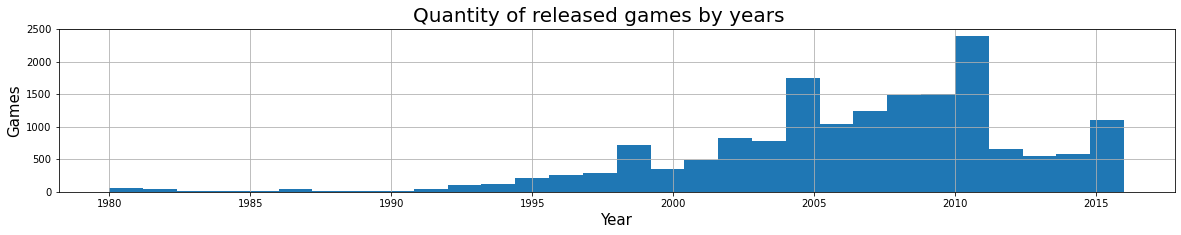

In [16]:
games['year_of_release'].hist(bins=30, figsize=(20,3))
plt.suptitle('Quantity of released games by years', fontsize='20')
plt.xlabel('Year', fontsize='15')
plt.ylabel('Games', fontsize='15')
;

We can see an increase of releases from 1990 and the peak in 2010 and then going down. Can we suggest that games are becoming less popular? Maybe an answer to this question in smartphones and tablets: a lot of games now are created for Android and iOS, also now there are a lot of online games, that is why probably a quantity of video games for consoles and PC is going down.

### <a id="3-2">3-2. Games by consoles</a>

In our dataset we have data from 1980, so we can see at games trands. Let's take only consoles which earn more than 200M dollars:

In [17]:
games_grouped = games.groupby('platform')['total_sales'].sum().copy()
platforms_sorted = games_grouped[games_grouped > 200].keys()

''

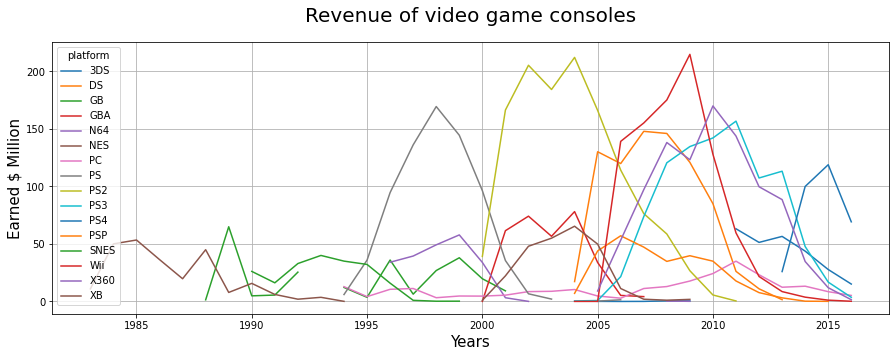

In [18]:
(games
    [games['platform'].isin(platforms_sorted)]
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(15,5))
)

plt.title('Revenue of video game consoles', fontsize=20, pad=20)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Earned $ Million', fontsize=15)
;

Avarage lifetime of console is ten years, in the middle of this period a platform is on the peak of it's popularity and than starts to go down.

But we also need to explore data of last years, because we want to predict what will be popular next year to sell in our shop. We can take data from 2013 year – some of the most popular consoles were realeased in this year by the way. We can look at data in line chart and box chart:

''

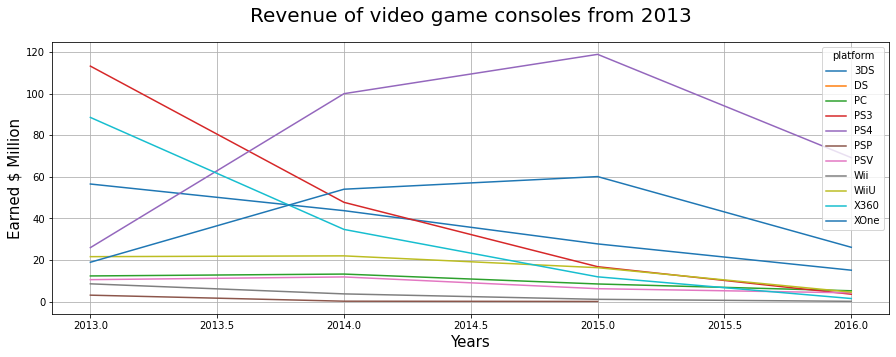

In [19]:
(games
    .query('year_of_release >= 2013')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(15,5))
)

plt.title('Revenue of video game consoles from 2013', fontsize=20, pad=20)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Earned $ Million', fontsize=15)
;

''

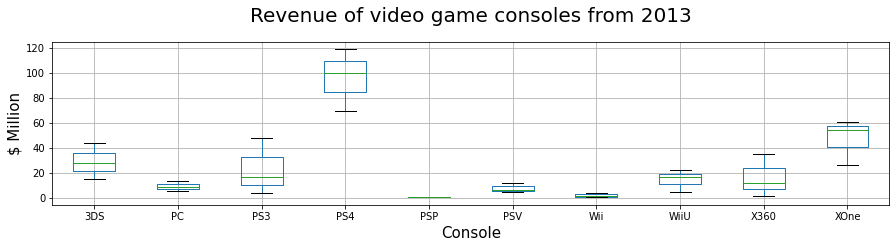

In [20]:
(games
    .query('year_of_release > 2013')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .boxplot(grid=True, figsize=(15,3))
    )

plt.title('Revenue of video game consoles from 2013', fontsize=20, pad=20)
plt.xlabel('Console', fontsize=15)
plt.ylabel('$ Million', fontsize=15)
;

#### SUMMARY
Avarage lifetime of console is ten years. We know, that PlayStation launches it's consoles once in five years, and after that the popularity of previous console version starts to go down. PS launched the foutrh version of it's console in 2013 and it is quite popular right now, and probably there will be no new console in 2017.

Also Xbox One is popular now, and it was also launched in 2013. It sells not that good as PlayStation, but these two consoles look the most popular.

Also we can notice 3DS here which also have its fans.

And, how can we notice from box chart, the most popular in term of revenue from games selling were PS3 – the previous version of PS4, and X360 – the previous version of XOne. So we can suggest that next versions also will be popular.

### <a id="3-3">3-3. Dependence of score on sales</a>

Does the score matter? To make it clear let's choose one console - for example PS3 – and look at it's correlation between scores and sales. Also we can use corr() method to see it.

Let's starts with a scatter chart for user's score:

In [21]:
games_with_user_score = games.query('user_score != -1').copy()

''

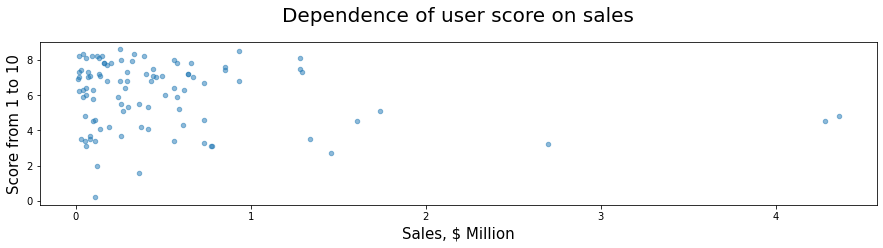

In [22]:
(games_with_user_score
    .query('platform == "PS3"')
    .query('year_of_release > 2013')
    .plot(x='total_sales', y='user_score', kind='scatter', figsize=(15,3), alpha=0.5)
     )

plt.title('Dependence of user score on sales', fontsize=20, pad=20)
plt.xlabel('Sales, $ Million', fontsize=15)
plt.ylabel('Score from 1 to 10', fontsize=15)
;

Let's see at correlation between user's score and sales:

In [23]:
display(games_with_user_score['total_sales'].corr(games_with_user_score['user_score']))
display(games_with_user_score['user_score'].corr(games_with_user_score['total_sales']))

0.0881791198757913

0.08817911987579131

And we do the same for ctiric's scores:

In [24]:
games_with_critic_score = games.query('critic_score != -1').copy()

''

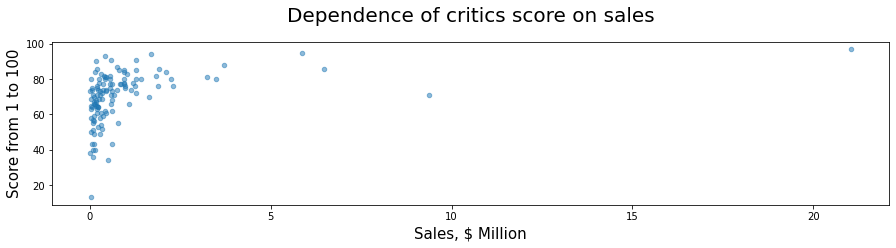

In [25]:
(games_with_critic_score
    .query('platform == "PS3"')
    .query('year_of_release >= 2013')
    .plot(x='total_sales', y='critic_score', kind='scatter', figsize=(15,3), alpha=0.5)
    )

plt.title('Dependence of critics score on sales', fontsize=20, pad=20)
plt.xlabel('Sales, $ Million', fontsize=15)
plt.ylabel('Score from 1 to 100', fontsize=15)
;

And we look at the correlation:

In [26]:
display(games_with_critic_score['total_sales'].corr(games_with_critic_score['critic_score']))
display(games_with_critic_score['critic_score'].corr(games_with_critic_score['total_sales']))

0.24550668717736326

0.24550668717736326

#### SUMMARY

We can see by charts and correlation method results there is no a big correlation between game scores and it's revenue. That is why we can almost ignore games scores.

### <a id="3-4">3-4. Profitable genres</a>

On the bar chart below we can see what genres were more popular in terms of sales:

''

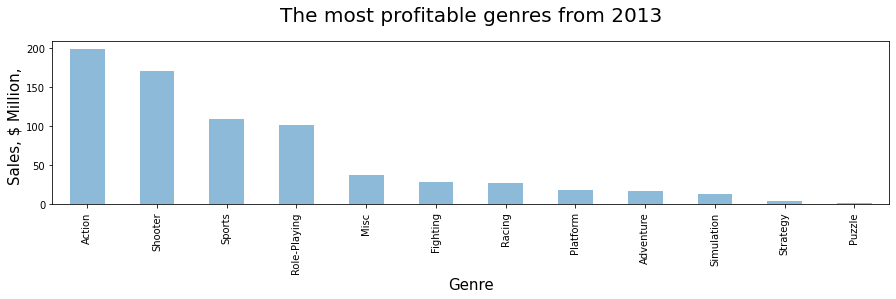

In [27]:
(games
    .query('year_of_release > 2013')
    .groupby('genre')['total_sales'].sum().sort_values(ascending=False)
    .plot(kind='bar', figsize=(15,3), alpha=0.5)
    )

plt.title('The most profitable genres from 2013', fontsize=20, pad=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales, $ Million, ', fontsize=15)
;

Action is the most popular genre of last years. Shooter is the second, and on the third Role-Playing and Sports.

## <a id="step4">Part 4. User profile</a>

### <a id="4-1">4-1. Platforms by regions</a>

We can see on a bar chart sales of consoles in different regions:

''

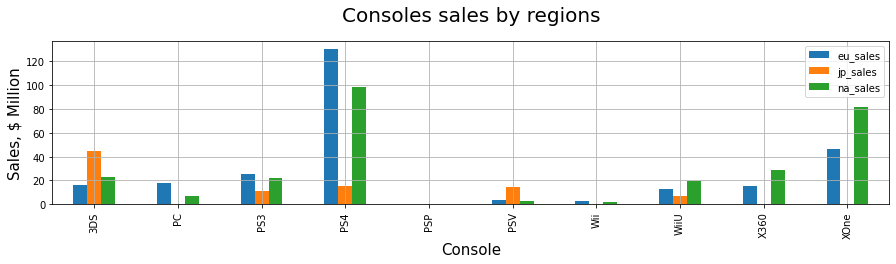

In [28]:
(games
    .query('year_of_release > 2013')
    .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(15,3))
    )

plt.title('Consoles sales by regions', fontsize=20, pad=20)
plt.xlabel('Console', fontsize=15)
plt.ylabel('Sales, $ Million', fontsize=15)
;

We can see that different consoles are popular in different regions: for example japanese 3DS and DS sales better in Japan – however it sells in other regions. PlayStation is popular in America and Europe, and also sells in Japan. And Xbox especially popular in America, has some sales in Europe, and no sales in Japan.

#### SUMMARY

We recommend to sell different console games for different regions:
- Promotion of Nintendo games in Japan primarily; no Xbox promtion.
- Promotion of PlayStation and Xbox in Europe primarily;
- Promotion of Xbox in America primarly, also we can promote Playstation there.

### <a id="4-2">4-2. Genres by regions</a>

On the bar chart below we can see how different genres sell on different markets.

''

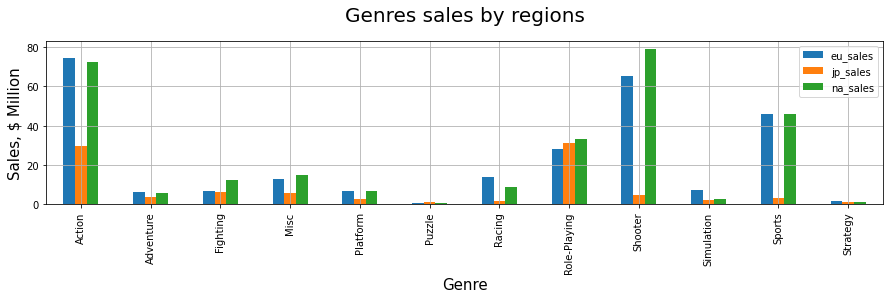

In [29]:
(games
    .query('year_of_release > 2013')
    .pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(15,3))
    )

plt.title('Genres sales by regions', fontsize=20, pad=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales, $ Million', fontsize=15)
;

We can see from the chart above that pazzles and strategies are not popular now. Also we can see that the most popular genre Action is less popular than Role-Playing games in Japan, but anyway the most popular in America and Europe. Shooter and Sports, which are also popular in America and Europe, are not popular in Japan.

#### SUMMARY

We also recommend to prioritize different genres depending on region:
- Role-Playing genre is the most popular in Japan;
- Other genres have the same popularity in America and Europe, and it follow the conclusion from previous chart about genres. 

### <a id="4-3">4-3. Are ratings by regions</a>

On the chart below we can see how raiting affect sales in different regions:

''

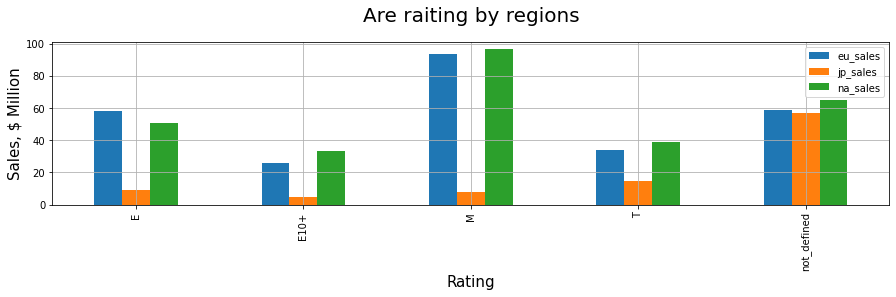

In [30]:
(games
    .query('year_of_release > 2013')
    .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(15,3))
    )

plt.title('Are raiting by regions', fontsize=20, pad=20)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Sales, $ Million', fontsize=15)
;

Games with 17+ Rating (M, Adult) are the most popular. And the commont ratio is almost the same between Europe and America, but we can see a different situation in Japan: raitings "for everybody" and "for teens" are more popular there, and a lot of games were not defined (probably because there is a different raiting system and we can't know it from our sources).

## <a id="step5">Part 5. Testing Hypotheses</a>

### <a id="5-1">5-1. Hypothesis 1. Average users score are the same for Xbox and PC </a>

**Null hypothesis H₀**
Average users score are the same for Xbox and PC.

**Alternative hypothesis H₁**
Average users score are different for Xbox and PC.

Before hypothesis tests we need to check a variance of two samples. If the difference will be more than 5% we should use option equal_var = False.

In [31]:
variance_XOne = np.var(games.query('platform == "XOne" & user_score != -1')['user_score'])
print('Variance of users score for Xbox:', variance_XOne)
variance_PC = np.var(games.query('platform == "PC" & user_score != -1')['user_score'])
print('Variance of users score for PC:', variance_PC)
print('The difference is {:.2%}'.format(1-variance_XOne/variance_PC))

Variance of users score for Xbox: 1.8965188383045533
Variance of users score for PC: 2.337747158036762
The difference is 18.87%


Testing a hypothesis about the means of two statistical populations based on samples taken from them:

In [32]:
alpha = .05 

results = st.ttest_ind(
    games.query('platform == "XOne" & user_score != -1')['user_score'], 
    games.query('platform == "PC" & user_score != -1')['user_score'],
    equal_var = False
)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis H₀")
else:
    print("It is not possible to reject the null hypothesis H₀")

p-value: 4.935072360183565e-06
Reject the null hypothesis H₀


We reject the null hypothesis, it means than average scores are different.

### <a id="5-2">5-2. Hypothesis 2. Average users score are different for Action and Sports genres </a>

**Null hypothesis H₀**
Average users score are the same for Action and Sports genres

**Alternative hypothesis H₁** 
Average users score are different for Action and Sports genres

Before hypothesis tests we need to check a variance of two samples. If the difference will be more than 5% we should use option equal_var = False.

In [33]:
variance_Action = np.var(games.query('genre == "Action" & user_score != -1')['user_score'])
print('Variance for users score for Action genre:', variance_Action)
variance_Sports = np.var(games.query('genre == "Sports" & user_score != -1')['user_score'])
print('Variance for users score for Sports genre:', variance_Sports)
print('The difference is {:.2%}'.format(1-variance_Action/variance_Sports))

Variance for users score for Action genre: 2.030636653826616
Variance for users score for Sports genre: 2.5941606711770206
The difference is 21.72%


And then we also testing a hypothesis about the means of two statistical populations based on samples taken from them:

In [34]:
alpha = .05 

results = st.ttest_ind(
    games.query('genre == "Action" & user_score != -1')['user_score'], 
    games.query('genre == "Sports" & user_score != -1')['user_score'],
    equal_var = False
)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis H₀")
else:
    print("It is not possible to reject the null hypothesis H₀")

p-value: 0.11483818791498286
It is not possible to reject the null hypothesis H₀


We can't reject the null hypothesis, it means that user's score are almost the same for these ganres.

## <a id="step6">Part 6. Summary</a>

For next year planning we recomment to focus on characteristics: a genre, a console, an age rating and a region follow these tips:
- The most popular console in Japan in Nintendo, users prefer Role-Playing genre without age limit or with 13+ rating. Also we recommend to sell Action genre games and games for PlayStation console.
- The most popular genres in America and Europe are Action and Shooter with Adult age raiting.
- Playstation is more popular in Europe, Xbox in more popular in America. Users also prefer to play PlayStation in Europe, and in America users can play all the consoles.